In [1]:
import numpy
from numpy.linalg import eigvals

def printMatrix(Array): # This function is for displaying 2D Array in 2D
    print(numpy.array(Array))

# Exercise 1
# a)
# input:(double Edges[n][2], int Nodes, boolean Directed)
def get_laplacian(Edges, NodeCount, Directed):
    Laplacian = [[0]*NodeCount for i in range(NodeCount)] # initialize n by n 0 array
    
    for Edge in Edges: # process every edge to construct laplacian
        Laplacian [Edge[1]] [Edge[0]] -= 1
        Laplacian [Edge[1]] [Edge[1]] += 1
        if Directed == False :
            Laplacian [Edge[0]] [Edge[1]] -= 1
            Laplacian [Edge[0]] [Edge[0]] += 1
            
    # output: int Laplacian[Nodes][Nodes]
    return Laplacian
            
# make a n node cycle graph
# input: (int Nodes)
def makeCycleGraph(Nodes):
    CycleGraph = [[i, i+1] for i in range(Nodes)]
    CycleGraph [Nodes-1][1] = 0
    # output: Graph[Nodes][2]
    return CycleGraph


In [2]:
# b)
printMatrix(get_laplacian([[0,1],
                           [1,2],
                           [2,0]],3,False))

[[ 2 -1 -1]
 [-1  2 -1]
 [-1 -1  2]]


In [3]:
printMatrix(get_laplacian([[0,1],
                           [1,2],
                           [2,0]],3,True))

[[ 1  0 -1]
 [-1  1  0]
 [ 0 -1  1]]


In [4]:
# c)
C5eigen = numpy.sort(eigvals(get_laplacian(makeCycleGraph(5),5,False)))
# first make a cycle graph of 5 vertices, get it's laplacian, get eigenvalues, then sort it
print('Two smallest eigenvalues of C5 are %.4f, %.4f' % (C5eigen[0], C5eigen[1]))# smallest 2 elements
print('Two largest eigenvalues of C5 are %.4f, %.4f' % (C5eigen[-1], C5eigen[-2]))# largest 2 elements

Two smallest eigenvalues of C5 are -0.0000, 1.3820
Two largest eigenvalues of C5 are 3.6180, 3.6180


In [5]:
C15eigen = numpy.sort(eigvals(get_laplacian(makeCycleGraph(15),15,False)))
print('Two smallest eigenvalues of C15 are %.4f, %.4f' % (C15eigen[0], C15eigen[1]))
print('Two largest eigenvalues of C15 are %.4f, %.4f' % (C15eigen[-1], C15eigen[-2]))

Two smallest eigenvalues of C15 are -0.0000, 0.1729
Two largest eigenvalues of C15 are 3.9563, 3.9563


In [6]:
C199eigen = numpy.sort(eigvals(get_laplacian(makeCycleGraph(199),199,False)))
print('Two smallest eigenvalues of C199 are %.4f, %.4f' % (C199eigen[0], C199eigen[1]))
print('Two largest eigenvalues of C199 are %.4f, %.4f' % (C199eigen[-1], C199eigen[-2]))

Two smallest eigenvalues of C199 are -0.0000, 0.0010
Two largest eigenvalues of C199 are 3.9998, 3.9998


In [7]:
# Exercise 2
# a)
from matplotlib import pyplot as plt

Graph = [[0,2],
         [1,2],
         [2,3],
         [2,4],
         [2,6],
         [4,6],
         [4,5],
         [4,7],
         [6,5],
         [6,7],
         [6,8]] # the graph from question
Laplacian = get_laplacian(Graph, 9, False)
print('Smallest non-0 eigenvalue = %.4f'%numpy.sort(eigvals(Laplacian))[1])

#input: (double x_0[Nodes], double total_time, double Laplacian[Nodes][Nodes], double iteration_interval)
def simulate_consensus(x_0, T, L, dt = 0.001):
    iterations = int(T/dt) # force into integer
    dimensions = len(x_0)
    timelog = [0.0] * (iterations+1) #create empty array with desired length
    statelog = [[0.0] * (iterations+1) for i in range(dimensions)]
    time = 0.0 + dt # time of first iterations
    for i in range(dimensions): #initialize the first column, x_0 = x[t=0]
        statelog[i][0] = x_0[i]
    
    for i in range(iterations):
        timelog[i+1] = time
        time += dt
        for j in range(dimensions):
            state = statelog[j][i]
            for k in range(dimensions):
                state -= dt * L[j][k] * statelog[k][i]
            statelog[j][i+1] = state
    # output: 1D array of timetags, 2D array of state history during simulation
    return timelog, statelog

# this function takes the timelog ans statelog to calculate time spent to reach consensus
# input: timelog ans statelog from simulate_consensus, int allowed_error_of_convergence
def time_of_consensus(timelog, statelog, precision):
    dimensions = len(statelog) # get dimension
    for time in range(len(timelog)):
        maxVal = statelog[0][time]
        minVal = statelog[0][time]
        for i in range(1,dimensions): #find the max value and min value of a certain time
            if (statelog[i][time]>maxVal):
                maxVal = statelog[i][time]
            elif (statelog[i][time]<minVal):
                minVal = statelog[i][time]
        if (maxVal - minVal <= precision): #if the difference is smaller than required precision, return current time
            return timelog[time]
    return -1.0 # if it cannot reach consensus in the entire statelog, return -1
            

Smallest non-0 eigenvalue = 0.5411


Converge time: 12.831


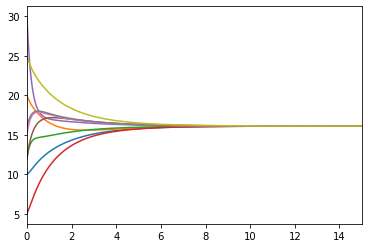

In [8]:
# b)
x_0 = [10, 20, 12, 5, 30, 12, 15, 16, 25]
timelog, statelog = simulate_consensus(x_0, 15, Laplacian,0.001)

# %matplotlib inline 
plt.clf()
for i in range(len(x_0)):
    plt.plot(timelog, statelog[i])
plt.xlim(0,15)
plt.show

print('Converge time: %.3f'%time_of_consensus(timelog, statelog, 0.01))

Smallest non-0 eigenvalue = 1.0000
Converge time: 7.310


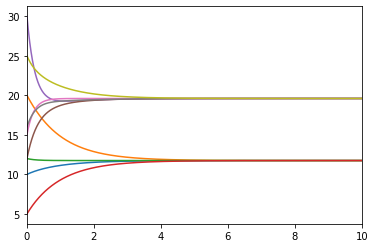

In [9]:
# c)
Graph = [[0,2],
         [1,2],
         [2,3],
         [4,6],
         [4,5],
         [4,7],
         [6,5],
         [6,7],
         [6,8]]
Laplacian = get_laplacian(Graph, 9, False)
print('Smallest non-0 eigenvalue = %.4f'%numpy.sort(eigvals(Laplacian))[2])

timelog, statelog = simulate_consensus(x_0, 10, Laplacian,)

# %matplotlib inline 
plt.clf()
for i in range(len(x_0)):
    plt.plot(timelog, statelog[i])
plt.xlim(0,10)
plt.show

converge1 = [statelog[0],statelog[1],statelog[2],statelog[3]]
converge2 = [statelog[4],statelog[5],statelog[6],statelog[7],statelog[8]]
time1 = time_of_consensus(timelog, converge1, 0.01)
time2 = time_of_consensus(timelog, converge2, 0.01)
print('Converge time: %.3f'%max(time1,time2))

Smallest non-0 eigenvalue = 9.0000
Converge time: 0.866


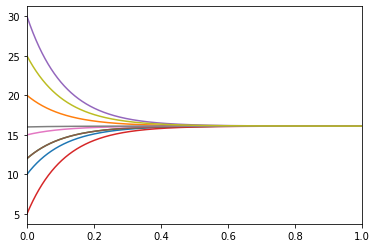

In [10]:
# d)
def makeCompleteGraph(Nodes):
    CompleteGraph = [[0,0] for i in range(int(Nodes*(Nodes-1)/2))]
    k = 0
    for i in range(Nodes):
        for j in range(i):
            CompleteGraph[k] = [i,j] #new node connect to every existing nodes
            k += 1
    return CompleteGraph


Graph = makeCompleteGraph(9)
Laplacian = get_laplacian(Graph, 9, False)
print('Smallest non-0 eigenvalue = %.4f'%numpy.sort(eigvals(Laplacian))[1])

timelog, statelog = simulate_consensus(x_0, 1, Laplacian,)

# %matplotlib inline 
plt.clf()
for i in range(len(x_0)):
    plt.plot(timelog, statelog[i])
plt.xlim(0,1)
plt.show

print('Converge time: %.3f'%time_of_consensus(timelog, statelog, 0.01))

Smallest non-0 eigenvalue = 0.4679
Converge time: 12.920


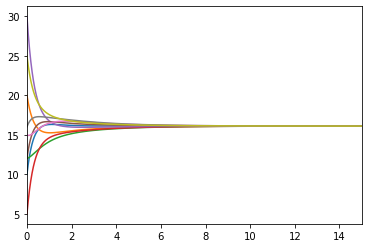

In [11]:
# e)
Graph = makeCycleGraph(9)
Laplacian = get_laplacian(Graph, 9, False)
print('Smallest non-0 eigenvalue = %.4f'%numpy.sort(eigvals(Laplacian))[1])

timelog, statelog = simulate_consensus(x_0, 15, Laplacian,)

# %matplotlib inline 
plt.clf()
for i in range(len(x_0)):
    plt.plot(timelog, statelog[i])
plt.xlim(0,15)
plt.show

print('Converge time: %.3f'%time_of_consensus(timelog, statelog, 0.01))

Converge time: 6.225, converged at -3.797


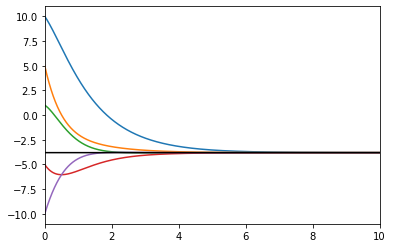

In [12]:
# Exercise 3
# c)
Graph = [[1,0],
         [1,2],
         [2,4],
         [4,1],
         [4,3],
         [3,2]]
Laplacian = get_laplacian(Graph, 5, True)
x_0 = [10,5,1,-5,-10]
# print('Smallest non-0 eigenvalue = %.4f'%numpy.sort(eigvals(Laplacian))[1])
timelog, statelog = simulate_consensus(x_0, 10, Laplacian,)
# %matplotlib inline 
plt.clf()
for i in range(len(x_0)):
    plt.plot(timelog, statelog[i])
plt.plot(timelog,[-3.8]*len(timelog),C='black') #Expected convergence value
plt.xlim(0,10)
plt.show

print('Converge time: %.3f, converged at %.3f'%(time_of_consensus(timelog, statelog, 0.1),statelog[0][len(timelog)-1]))


Converge time: 6.621, converged at 0.202


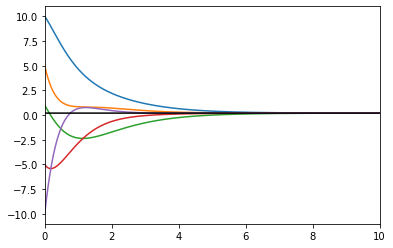

In [13]:
# d)
Graph = [[1,0],
         [0,4],
         [2,4],
         [4,1],
         [4,3],
         [3,2]]
Laplacian = get_laplacian(Graph, 5, True)
x_0 = [10,5,1,-5,-10]
# print('Smallest non-0 eigenvalue = %.4f'%numpy.sort(eigvals(Laplacian))[1])
timelog, statelog = simulate_consensus(x_0, 10, Laplacian,)
# %matplotlib inline 
plt.clf()
for i in range(len(x_0)):
    plt.plot(timelog, statelog[i])
plt.plot(timelog,[0.2]*len(timelog),C='black') #Expected convergence value
plt.xlim(0,10)
plt.show

print('Converge time: %.3f, converged at %.3f'%(time_of_consensus(timelog, statelog, 0.1),statelog[0][len(timelog)-1]))


Converge time: 15.352, converged at -4.968


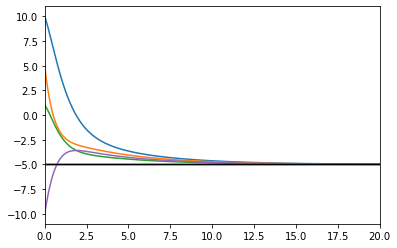

In [14]:
# e)
Graph = [[1,0],
         [1,2],
         [2,4],
         [4,1],
         [3,2]]
Laplacian = get_laplacian(Graph, 5, True)
x_0 = [10,5,1,-5,-10]
# print('Smallest non-0 eigenvalue = %.4f'%numpy.sort(eigvals(Laplacian))[1])
timelog, statelog = simulate_consensus(x_0, 20, Laplacian,)
# %matplotlib inline 
plt.clf()
for i in range(len(x_0)):
    plt.plot(timelog, statelog[i])
plt.plot(timelog,[-5.0]*len(timelog),C='black') #Expected convergence value
plt.xlim(0,20)
plt.show

print('Converge time: %.3f, converged at %.3f'%(time_of_consensus(timelog, statelog, 0.1),statelog[0][len(timelog)-1]))